## Simple Linear Regression Using Tensorflow

Examples modified from Hands-On Machine Learning with Scikit-Learn & Tensorflow

Using some matrix algebra we can calculate coefficients for a linear regression model. Theta is this vector and it is calculated with the formula below where $X$ is a matrix of features and $y$ is the label vector. We will run this model below using Tensorflow.

$$
\hat{\theta} = (X^T\cdot X)^{-1}\cdot X^{T}\cdot y
$$

In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
n_values = 100

In [3]:
x_values = np.linspace(-50, 50, n_values)
y_values = 10 + 2*x_values**2 + 3*x_values**3 + np.random.normal(40000, 40000, n_values)
# y_values = 10 + 2*x_values

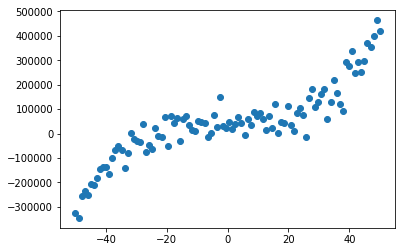

In [4]:
plt.scatter(x_values, y_values)

In [5]:
df = pd.DataFrame(data = [x_values, x_values**2, y_values]).T
df = df.rename(columns = {0: 'x', 1: 'x_square', 2: 'y'})

In [6]:
m, n = df.shape

We add a row of ones. This will give us a y intercept.

In [7]:
df_plus_bias = np.c_[np.ones((m, 1)), df]
df_features = df_plus_bias[:,:3]
df_target = df_plus_bias[:, 3:4]

Next will actually run the model we built above.

The theta output is shown below. The first value is the intercept.

We can visualize our predicted values versus the actual values. Perfectly predicted values will result in a straight-line.

## Implementing Gradient Descent

### Manually Computing the Gradients

In [8]:
n_epochs = 1000
learning_rate = 0.001

In [9]:
# X is the matrix that contains all of our independent features.
X = tf.constant(
    df_features,
    dtype=tf.float32,
    name = "X"
)

# y contains a vector of correct values for the features
y = tf.constant(
    df_target.reshape(-1, 1),
    dtype=tf.float32,
    name = "y"
)

# theta is initialized with random numbers
# this is what the algorithm will vary to create a solution
theta = tf.Variable(
    tf.random_uniform([2 + 1, 1], -1.0, 1.0),
    name = "theta"
)

# using matrix multiplication, we get a predicted y value
y_pred = tf.matmul(X, theta, name = "predictions")

# the prediction error is the difference between the true value and the predicted value
error = y_pred - y

# Computes the mean of elements across dimensions of a tensor
# this is what we want to minimize - RMSE
mse = tf.reduce_mean(
    tf.square(error), 
    name = "mse"
)

# to compute the gradient, using a built-in tensor flow method
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
thetas = []

with tf.Session() as sess:

    sess.run(init)
    
    for epoch in range(n_epochs):
        
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
            thetas.append(theta.eval())
        sess.run(training_op)
        

Epoch 0 MSE = 24881844000.0
Epoch 100 MSE = nan
Epoch 200 MSE = nan
Epoch 300 MSE = nan
Epoch 400 MSE = nan
Epoch 500 MSE = nan
Epoch 600 MSE = nan
Epoch 700 MSE = nan
Epoch 800 MSE = nan
Epoch 900 MSE = nan


We can see in the plot below, that with each epoch, the predicted values get a little bit better each time. However given the spread of all this data, a linear model is not really sufficient.

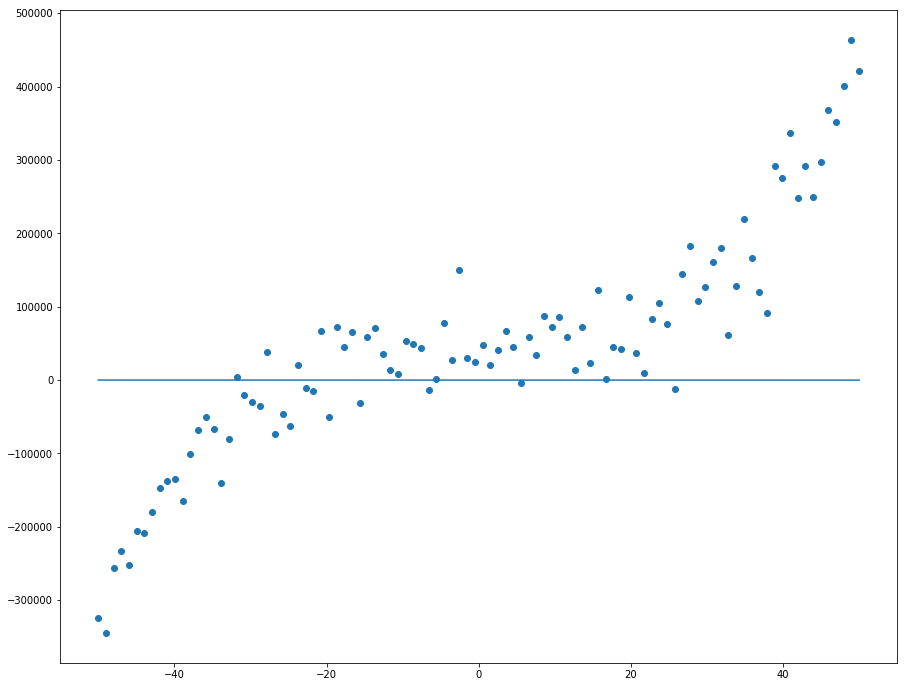

In [10]:
plt.figure(figsize=(15,12))
plt.scatter(x_values, y_values)
for i in np.arange(10): 
    y = thetas[i][0] + x_values * thetas[i][1]
    plt.plot(x_values, y)
plt.show()

In [11]:
thetas

[array([[-0.16851974],
        [-0.86200094],
        [ 0.2125547 ]], dtype=float32), array([[nan],
        [nan],
        [nan]], dtype=float32), array([[nan],
        [nan],
        [nan]], dtype=float32), array([[nan],
        [nan],
        [nan]], dtype=float32), array([[nan],
        [nan],
        [nan]], dtype=float32), array([[nan],
        [nan],
        [nan]], dtype=float32), array([[nan],
        [nan],
        [nan]], dtype=float32), array([[nan],
        [nan],
        [nan]], dtype=float32), array([[nan],
        [nan],
        [nan]], dtype=float32), array([[nan],
        [nan],
        [nan]], dtype=float32)]